In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import decimal
from multiprocessing import Pool
from functools import partial
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
def tRSSA_target_left(tmax, k1, n0, A, nrep):
    np.random.seed() 
    kr = 0                                       # rate of dissociation of complex AB (kr) is 0 as rxn irreversible
    kf = 4.68*10**5                              # rate of formation of complex AB (kf) taken from terrak1999catalytic
    kD = 0                                       # kD is 0 due to irreversiblity
    beta = kr+kf*A
    dt = 0.1
    t  = 0
    n  = n0
    nl = n0 - 0.1*n0
    nu = n0 + 0.1*n0
    nlist = [n0]
    tlist = np.arange(t,tmax+dt,dt)

    i = 1
    hl = nl
    hu = nu
    c1l = (1-math.exp(-beta*t))/((kD/A)+1)          # stochastic rate constant for death of bacteria to take place due to antibiotic
    c1u = (1-math.exp(-beta*(t+dt)))/((kD/A)+1)
    c2l = k1                                        # stochastic rate constant for birth of bacteria to take place (constant)
    c2u = k1
    a1l = c1l*hl                                    # propensity for death of bacteria to take place due to antibiotic
    a1u = c1u*hu
    a2l = c2l*hl                                    # propensity for birth of bacteria to take place due to antibiotic
    a2u = c2u*hu
    a0u = a1u + a2u                                 # total propensity a0 = a1 +a2
    update = [-1, 1]                               # update = stoichiometry for reaction , so for birth rate no of bacteria increases by 1 and for death it decreases by 1

    tTotlist = [t]

    while n>0:

        greater = True
        j = 0
        while greater == True:
            r1 = np.random.uniform(0,1)
            tau = -math.log(r1)/a0u
            t = t+tau

            if t>tlist[i] and i<tmax/dt:
                j = j+1 
                t = tlist[i]
                i = i+1

                c1l = (1-math.exp(-beta*tlist[i-1]))/((kD/A)+1)
                c1u = (1-math.exp(-beta*tlist[i]))/((kD/A)+1)
                c2l = k1
                c2u = k1
                a1l = c1l*hl
                a1u = c1u*hu
                a2l = c2l*hl
                a2u = c2u*hu
                a0u = a1u+a2u 
                
            else: 
                greater = False

        rb = np.random.uniform(0,1,2)                   # generating two random numbers to predict which rxn will occur and at what time
        allist = [a1l, a2l]
        aulist = [a1u, a2u]
        ausum = np.cumsum(aulist)                       # calculatig cumalative sum of propensities 
 
        idxlist = np.where(ausum > rb[0]*(a1u+a2u))
        idx = idxlist[0][0]                             # finding minimum index which satisfies ausum >rb[0]*(a0u)

        accepted = False
        if rb[1] <= allist[idx]/aulist[idx]:            # condition for rxn to be fired
            accepted = True

        else:
            alist = [(((1-math.exp(-beta*t))/((kD/A)+1)))*nlist[-1], k1*nlist[-1]]
            if rb[1] <= alist[idx]/aulist[idx]:         # success probability
                accepted = True

        if accepted:
            n = nlist[-1] + update[idx]               # updating the state 
  

            if n > hu or n < hl:
                hl = n - 0.1*n
                hu = n + 0.1*n
                c1l = (1-math.exp(-beta*tlist[i-1]))/((kD/A)+1)
                c1u = (1-math.exp(-beta*tlist[i]))/((kD/A)+1)
                c2l = k1
                c2u = k1
                a1l = c1l*hl
                a1u = c1u*hu
                a2l = c2l*hl
                a2u = c2u*hu
                a0u = a1u+a2u 


        tTotlist.append(t)
        nlist.append(n)

    return (tTotlist, nlist)

In [4]:
n0s = [10,100,1000]                                # initial bacterial population
tmax = 30000
k1 = 0.5
As = [10**-6,5*10**-6,10**-5,5*10**-5,10**-4]      # Antibiotic concentration in Molar   
kr = 0 
kf = 4.68*10**5 
kD = kr/kf

for A in As:
    print('A = {}'.format(A))
    for n0 in n0s:
        nreps = list(range(0,1000))
        pool = Pool(processes=3)
        func = partial(tRSSA_target_left,tmax,k1,n0,A)
        result = pool.map(func,nreps)
        pool.close()
        pool.join()
        trajectory = result
        fname = "/home/rati/Downloads/nafisa/ampicillin/case2/N Kconst Avariable/traj_dt_0.1_a0u2_added_fraction_target_left_over_k1_{0}_n0_{1}_A_{2}.p".format(k1,n0,A)
        pickle_out = open(fname,"wb")
        pickle.dump(trajectory, pickle_out)
        pickle_out.close()

A = 4e-06
A = 9e-06


[8.349176005273748]
[8.349176005273748, 13.097973930152897]
[8.349176005273748, 13.097973930152897, 17.909097371125945]
[5.393258856860524]
[5.393258856860524, 9.862840517822653]
[5.393258856860524, 9.862840517822653, 14.5635976111249]
[4.986611623699822]
[4.986611623699822, 9.468969808398054]
[4.986611623699822, 9.468969808398054, 14.032834773502579]
[4.809356178518894]
[4.809356178518894, 8.958884833806238]
[4.809356178518894, 8.958884833806238, 13.623932751864855]
[4.712202394612739]
[4.712202394612739, 9.23991716454018]
[4.712202394612739, 9.23991716454018, 13.736410854788529]


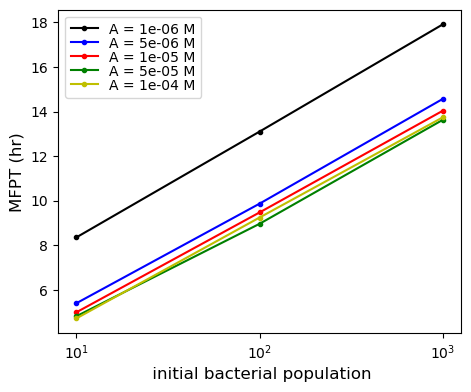

In [3]:
xpos = -0.1
ypos = 1.10
markers_sim = ['ko','bo','ro','go','yo']
markers_calc = ['k.-','b.-','r.-','g.-','y.-']
n0s = [10,100,1000]
k1 = 0.5                 #birth rate of bacteria 

As = [10**-6,5*10**-6,10**-5,5*10**-5,10**-4]
nreps = 1000                             

j = 0
for A in As:
    Tmeans = []
    Tvars = []
    Tstds = []
    Fano = []
    CV = []
    R = []

    for i in range(len(n0s)):
        n0 = n0s[i]
        fname = "/home/rati/Downloads/nafisa/ampicillin/case2/N Kconst Avariable/traj_dt_0.1_a0u2_added_fraction_target_left_over_k1_{0}_n0_{1}_A_{2}.p".format(k1,n0,A)
        with open(fname, 'rb') as fr:
            try:
                while True:
                    data = pickle.load(fr)
                    fptList = []
                    for ni in range(nreps):
                        fpt = data[ni][0][-1]
                        fptList.append(fpt)
                    Tmean = np.mean(fptList)
                    Tvar = np.var(fptList)
                    Tstd = np.std(fptList)
                    Tmeans.append(Tmean)
                    Tvars.append(Tvar)
                    Tstds.append(Tstd)
                    Fano.append(Tvar/Tmean)
                    R.append(Tvar/(Tmean**2))
                    CV.append(Tstd/Tmean)
            except EOFError:
                pass
        fr.close()
        print(Tmeans)
    plt.plot(n0s, Tmeans, markers_calc[j], label='A = {:.0e} M'.format(As[j]))
    plt.ylabel('MFPT (hr)',fontsize = 12)
    
    j = j +1

plt.xlabel(' initial bacterial population',fontsize = 12)
plt.tick_params(which='minor',color='w')
fig = plt.gcf()
fig.set_size_inches(5.2,4.2)
plt.legend( loc="best",bbox_transform=fig.transFigure, ncol=1,labelspacing=0)
plt.xscale('log')
fig.savefig('ampicillin MFPT wrtN Kconst Avar ', dpi=1200)
plt.show()

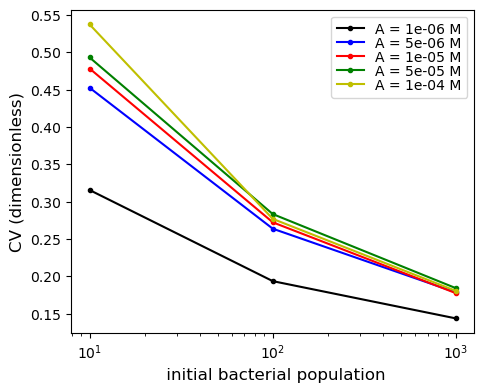

In [4]:
xpos = -0.1
ypos = 1.10
markers_sim = ['ko','bo','ro','go','yo']
markers_calc = ['k.-','b.-','r.-','g.-','y.-']
n0s = [10,100,1000]
k1 = 0.5
As = [10**-6 ,5*10**-6,10**-5,5*10**-5,10**-4]
nreps = 1000

j = 0
for A in As:
    Tmeans = []
    Tvars = []
    Tstds = []
    Fano = []
    CV = []
    R = []

    for i in range(len(n0s)):
        n0 = n0s[i]
        fname = "/home/rati/Downloads/nafisa/ampicillin/case2/N Kconst Avariable/traj_dt_0.1_a0u2_added_fraction_target_left_over_k1_{0}_n0_{1}_A_{2}.p".format(k1,n0,A)
        with open(fname, 'rb') as fr:
            try:
                while True:
                    data = pickle.load(fr)
                    fptList = []
                    for ni in range(nreps):
                        fpt = data[ni][0][-1]
                        fptList.append(fpt)
                    Tmean = np.mean(fptList)
                    Tvar = np.var(fptList)
                    Tstd = np.std(fptList)
                    Tmeans.append(Tmean)
                    Tvars.append(Tvar)
                    Tstds.append(Tstd)
                    Fano.append(Tvar/Tmean)
                    R.append(Tvar/(Tmean**2))
                    CV.append(Tstd/Tmean)
            except EOFError:
                pass
        fr.close()
    plt.plot(n0s, CV, markers_calc[j], label='A = {:.0e} M'.format(As[j]))
    plt.ylabel('CV (dimensionless)',fontsize = 12)
    
    j = j +1

plt.xlabel(' initial bacterial population',fontsize = 12)
fig = plt.gcf()
fig.set_size_inches(5.2,4.2)
plt.legend( loc="best",bbox_transform=fig.transFigure, ncol=1,labelspacing=0)
plt.xscale('log')
fig.savefig('ampicillin CV wrtN Kconst Avar', dpi=1200)
plt.show()


(array([111., 213., 173., 151.,  89.,  82.,  50.,  47.,  23.,  13.,  16.,
          8.,   5.,   7.,   4.,   4.,   2.,   1.,   0.,   1.]),
 array([ 0.07038047,  0.76456205,  1.45874363,  2.15292521,  2.8471068 ,
         3.54128838,  4.23546996,  4.92965155,  5.62383313,  6.31801471,
         7.0121963 ,  7.70637788,  8.40055946,  9.09474105,  9.78892263,
        10.48310421, 11.1772858 , 11.87146738, 12.56564896, 13.25983055,
        13.95401213]),
 <BarContainer object of 20 artists>)

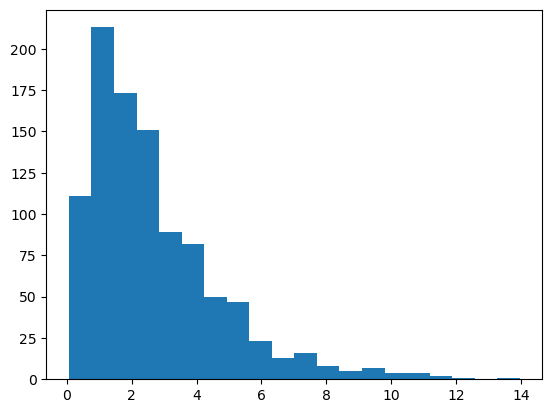

In [5]:
plt.hist(fptList,bins=20)

1000
[6, 6, 5, 4, 3, 2, 3, 2, 1, 0]
[7, 6, 5, 4, 3, 3, 2, 1, 1, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[8, 7, 6, 5, 4, 3, 2, 2, 1, 0]
[6, 5, 4, 3, 2, 1, 2, 1, 1, 0]
[8, 7, 6, 5, 4, 3, 2, 2, 1, 0]
[7, 6, 5, 4, 5, 4, 3, 2, 1, 0]
[7, 6, 5, 4, 3, 2, 3, 2, 1, 0]
[6, 5, 6, 5, 5, 4, 3, 2, 1, 0]
[6, 5, 4, 4, 3, 2, 1, 2, 1, 0]


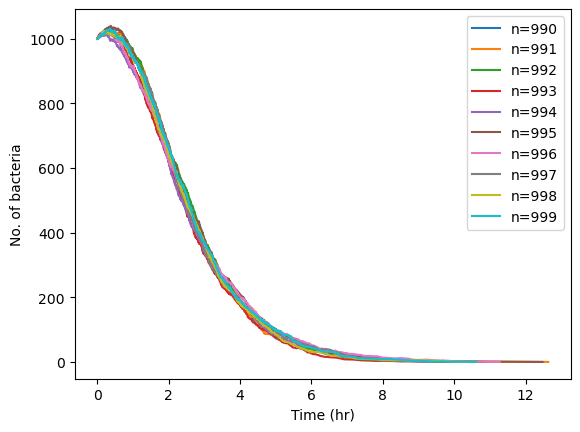

In [8]:
As =[10**-6]
n0= 1000
for i in range(len(As)):
    A = As[i]
    fname = "/home/rati/Downloads/nafisa/ampicillin/case2/N Kconst Avariable/traj_dt_0.1_a0u2_added_fraction_target_left_over_k1_{0}_n0_{1}_A_{2}.p".format(k1,n0,A)
    with open(fname, 'rb') as fr:
        try:
            while True:
                data = pickle.load(fr)
                print(len(data))
    
                for j in range(990,1000):
                    tTotlist = data[j][0]
                    nlist = data[j][1]
                    print(nlist[-10:])
                    plt.plot(tTotlist,nlist,label='n={}'.format(j))
                    plt.legend()
                    plt.xlabel('Time (hr)')
                    plt.ylabel('No. of bacteria')
        except EOFError:
            pass
    fr.close()

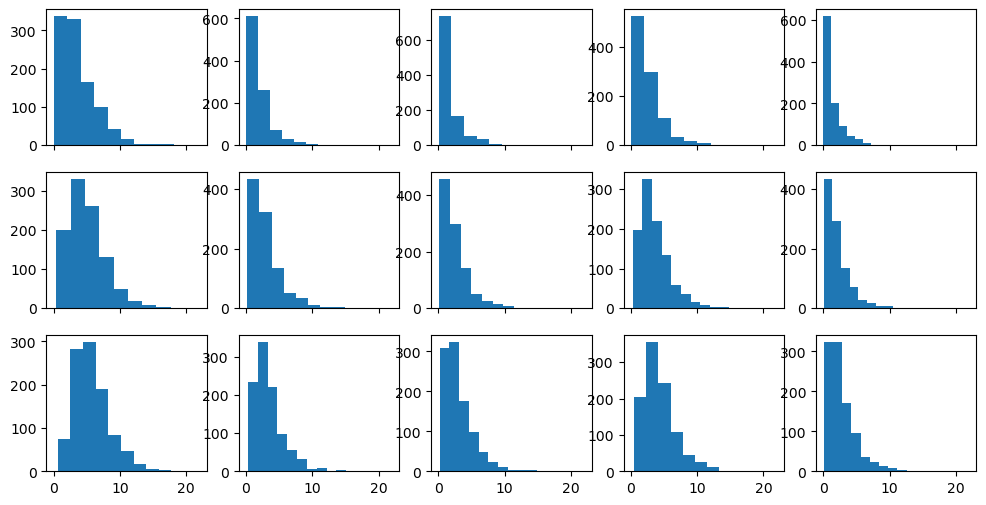

In [6]:
xpos = -0.1
ypos = 1.10
markers_sim = ['ko','bo','ro','go']
markers_calc = ['k*--','b*--','r*--','g*--']
n0s = [1.00,2.00,3.00]
k1 =0.5
As = [10**-6,5*10**-6,10**-5,2*10**-6,10**-4]
nreps = 1000
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, figsize=(12, 6))
j = 0
for A in As:
    Tmeans = []
    Tvars = []
    Tstds = []
    Fano = []
    CV = []
    R = []

    for i in range(len(n0s)):
        n0 = n0s[i]
        fname = "/home/rati/Downloads/nafisa/ampicillin/case2/N Kconst Avariable/traj_dt_0.1_a0u2_added_fraction_target_left_over_k1_{0}_n0_{1}_A_{2}.p".format(k1,n0,A)
        with open(fname, 'rb') as fr:
            try:
                while True:
                    data = pickle.load(fr)
                    fptList = []
                    for k in range(nreps):
                        fpt = data[k][0][-1]
                        fptList.append(fpt)
                    ax[i,j].hist(fptList)
            except EOFError:
                pass
        fr.close()

    j = j + 1
plt.show()